<a href="https://colab.research.google.com/github/vigilant-umbrella/hcv-prediction/blob/main/hcv_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import f_classif

from scipy.stats import kendalltau

In [ ]:
%%shell
if ! [ -f "hcvdat0.csv" ]; then
    wget https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv 
fi

--2021-09-25 15:14:23--  https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46183 (45K) [application/x-httpd-php]
Saving to: ‘hcvdat0.csv’

hcvdat0.csv         100%[===================>]  45.10K   152KB/s    in 0.3s    

2021-09-25 15:14:24 (152 KB/s) - ‘hcvdat0.csv’ saved [46183/46183]



# Data Cleaning

In [ ]:
data = pd.read_csv('hcvdat0.csv')

data = data[(data['Category']!='0=Blood Donor') & (data['Category']!='0s=suspect Blood Donor')].reset_index(drop=True)

X = data.drop(['Unnamed: 0', 'Category'], axis=1)
category = pd.DataFrame(data['Category'])

enc = OrdinalEncoder()
y = pd.DataFrame(enc.fit_transform(pd.DataFrame(category)), columns=['category'])

In [ ]:
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     75 non-null     int64  
 1   Sex     75 non-null     object 
 2   ALB     74 non-null     float64
 3   ALP     57 non-null     float64
 4   ALT     74 non-null     float64
 5   AST     75 non-null     float64
 6   BIL     75 non-null     float64
 7   CHE     75 non-null     float64
 8   CHOL    72 non-null     float64
 9   CREA    75 non-null     float64
 10  GGT     75 non-null     float64
 11  PROT    74 non-null     float64
dtypes: float64(10), int64(1), object(1)
memory usage: 7.2+ KB


,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,38,m,45.0,56.3,NaN,33.1,7.0,9.58,6.00,77.9,18.9,63.0
1,19,m,41.0,NaN,87.0,67.0,12.0,7.55,3.90,62.0,65.0,75.0
2,23,m,47.0,19.1,38.9,164.2,17.0,7.09,3.20,79.3,90.4,70.1
3,25,m,42.0,38.2,63.3,187.7,14.0,6.00,4.28,66.9,40.2,70.5
4,27,m,45.0,27.5,10.5,37.8,10.0,8.77,3.20,55.2,35.9,74.5


In [ ]:
X['Sex'].value_counts()

m    53
f    22
Name: Sex, dtype: int64

In [ ]:
X['Age'].describe()

count    75.000000
mean     48.426667
std      12.319149
min      19.000000
25%      39.500000
50%      49.000000
75%      58.000000
max      75.000000
Name: Age, dtype: float64

In [ ]:
y.head()

,category
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
category.value_counts()

Category   
3=Cirrhosis    30
1=Hepatitis    24
2=Fibrosis     21
dtype: int64

In [ ]:
y.value_counts()

category
2.0         30
0.0         24
1.0         21
dtype: int64

In [ ]:
X = pd.concat([X, pd.get_dummies(X.Sex, drop_first=True)], axis=1)
X = X.drop(['Sex'], axis=1)

In [ ]:
X.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,m
0,38,45.0,56.3,NaN,33.1,7.0,9.58,6.00,77.9,18.9,63.0,1
1,19,41.0,NaN,87.0,67.0,12.0,7.55,3.90,62.0,65.0,75.0,1
2,23,47.0,19.1,38.9,164.2,17.0,7.09,3.20,79.3,90.4,70.1,1
3,25,42.0,38.2,63.3,187.7,14.0,6.00,4.28,66.9,40.2,70.5,1
4,27,45.0,27.5,10.5,37.8,10.0,8.77,3.20,55.2,35.9,74.5,1


# Filling missing values

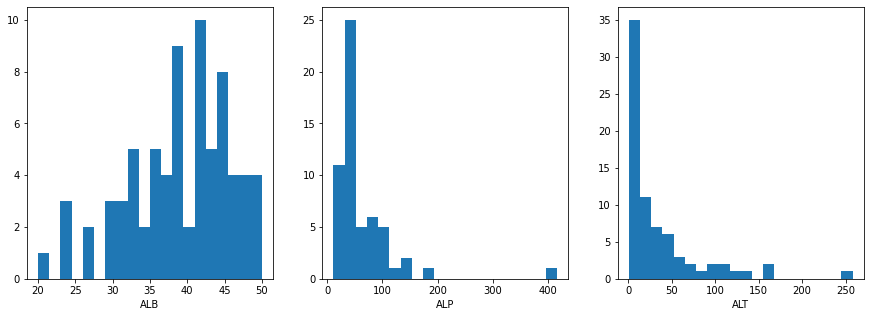

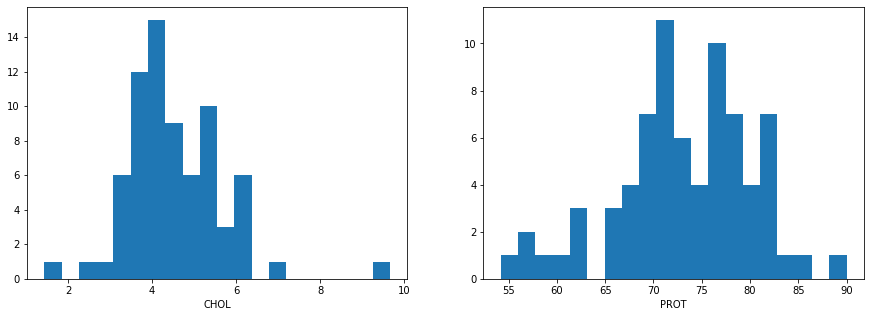

In [ ]:
_, ax1 = plt.subplots(1,3, figsize=(15,5))
for i, c in enumerate(['ALB', 'ALP', 'ALT']):
    ax1[i].hist(X[c], bins = 20)
    ax1[i].set_xlabel(c)

_, ax2 = plt.subplots(1,2, figsize=(15,5))
for i, c in enumerate(['CHOL', 'PROT']):
    ax2[i].hist(X[c], bins = 20)
    ax2[i].set_xlabel(c)

plt.show()

In [ ]:
X['ALB'] = X['ALB'].fillna(X['ALB'].median())
X['ALP'] = X['ALP'].fillna(X['ALP'].median())
X['ALT'] = X['ALT'].fillna(X['ALT'].median())
X['CHOL'] = X['CHOL'].fillna(X['CHOL'].mean())
X['PROT'] = X['PROT'].fillna(X['PROT'].mean())

In [ ]:
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     75 non-null     int64  
 1   ALB     75 non-null     float64
 2   ALP     75 non-null     float64
 3   ALT     75 non-null     float64
 4   AST     75 non-null     float64
 5   BIL     75 non-null     float64
 6   CHE     75 non-null     float64
 7   CHOL    75 non-null     float64
 8   CREA    75 non-null     float64
 9   GGT     75 non-null     float64
 10  PROT    75 non-null     float64
 11  m       75 non-null     uint8  
dtypes: float64(10), int64(1), uint8(1)
memory usage: 6.6 KB


,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,m
0,38,45.0,56.3,14.95,33.1,7.0,9.58,6.00,77.9,18.9,63.0,1
1,19,41.0,41.6,87.00,67.0,12.0,7.55,3.90,62.0,65.0,75.0,1
2,23,47.0,19.1,38.90,164.2,17.0,7.09,3.20,79.3,90.4,70.1,1
3,25,42.0,38.2,63.30,187.7,14.0,6.00,4.28,66.9,40.2,70.5,1
4,27,45.0,27.5,10.50,37.8,10.0,8.77,3.20,55.2,35.9,74.5,1


# Feature-feature correlation

## Pearson's Correlation Coefficient

In [ ]:
pearson_corr = X.corr(method='pearson')
pearson_corr

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,m
Age,1.000000,-0.416159,0.225077,-0.015231,0.155447,0.094624,-0.343094,-0.150006,-0.036005,0.241202,-0.094804,-0.250364
ALB,-0.416159,1.000000,-0.350854,0.174105,-0.208762,-0.546733,0.755507,0.341935,-0.117845,-0.064488,0.461053,0.123938
ALP,0.225077,-0.350854,1.000000,-0.186896,0.135145,0.146690,-0.260426,0.042190,0.264887,0.668420,-0.253271,-0.153949
ALT,-0.015231,0.174105,-0.186896,1.000000,0.065972,-0.155738,0.150974,0.040327,-0.137681,-0.033451,0.337921,0.034092
AST,0.155447,-0.208762,0.135145,0.065972,1.000000,0.100318,-0.304497,-0.201560,-0.172339,0.302988,-0.005127,0.104087
BIL,0.094624,-0.546733,0.146690,-0.155738,0.100318,1.000000,-0.538962,-0.112269,-0.048020,0.074370,-0.258045,0.087324
CHE,-0.343094,0.755507,-0.260426,0.150974,-0.304497,-0.538962,1.000000,0.457806,-0.046845,-0.137033,0.324888,0.077168
CHOL,-0.150006,0.341935,0.042190,0.040327,-0.201560,-0.112269,0.457806,1.000000,-0.050703,0.158887,0.174804,-0.032181
CREA,-0.036005,-0.117845,0.264887,-0.137681,-0.172339,-0.048020,-0.046845,-0.050703,1.000000,0.047239,-0.235819,0.032793
GGT,0.241202,-0.064488,0.668420,-0.033451,0.302988,0.074370,-0.137033,0.158887,0.047239,1.000000,0.022468,0.044079


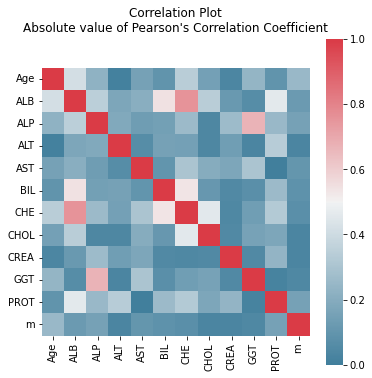

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

plt.title("Correlation Plot\nAbsolute value of Pearson's Correlation Coefficient\n\n")
sns.heatmap(pearson_corr.abs(),
            cmap=sns.diverging_palette(230, 10, as_cmap=True),
            square=True,
            vmin=0,
            vmax=1,
            ax=ax)
plt.show()

## Spearman's Correlation Coefficient

In [ ]:
spearman_corr = X.corr(method='spearman')
spearman_corr

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,m
Age,1.000000,-0.424149,0.290240,-0.156634,0.240149,0.306496,-0.374714,-0.153243,0.006828,0.183162,-0.048073,-0.251840
ALB,-0.424149,1.000000,-0.455724,0.385311,-0.248681,-0.439815,0.727340,0.336338,0.042277,-0.087185,0.394668,0.184270
ALP,0.290240,-0.455724,1.000000,-0.139192,0.199216,0.253967,-0.387496,-0.101365,0.149528,0.420860,-0.156469,-0.025914
ALT,-0.156634,0.385311,-0.139192,1.000000,0.293885,-0.152147,0.331199,0.109846,-0.030132,0.142622,0.438282,0.096049
AST,0.240149,-0.248681,0.199216,0.293885,1.000000,0.420356,-0.323250,-0.201241,-0.238860,0.341625,0.008017,0.132576
BIL,0.306496,-0.439815,0.253967,-0.152147,0.420356,1.000000,-0.562112,-0.238971,0.138280,0.160771,-0.137559,0.113061
CHE,-0.374714,0.727340,-0.387496,0.331199,-0.323250,-0.562112,1.000000,0.482455,0.027358,-0.128921,0.293033,0.114987
CHOL,-0.153243,0.336338,-0.101365,0.109846,-0.201241,-0.238971,0.482455,1.000000,0.050743,0.061660,0.092420,-0.075086
CREA,0.006828,0.042277,0.149528,-0.030132,-0.238860,0.138280,0.027358,0.050743,1.000000,0.148898,0.013118,0.136642
GGT,0.183162,-0.087185,0.420860,0.142622,0.341625,0.160771,-0.128921,0.061660,0.148898,1.000000,0.115427,0.143399


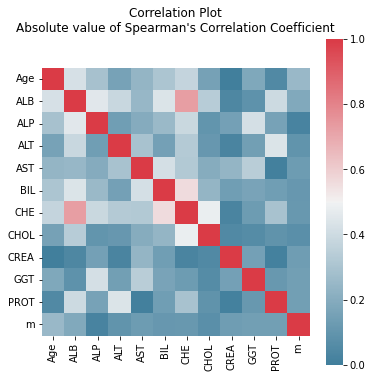

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

plt.title("Correlation Plot\nAbsolute value of Spearman's Correlation Coefficient\n\n")
sns.heatmap(spearman_corr.abs(),
            cmap=sns.diverging_palette(230, 10, as_cmap=True),
            square=True,
            vmin=0,
            vmax=1,
            ax=ax)
plt.show()

# Feature-target correlation

## ANOVA F-value

In [ ]:
anova_f_values = f_classif(X.drop(['m'], axis=1), y['category'])[0]

linear_corr = pd.Series(anova_f_values, index=X.drop(['m'], axis=1).columns)
linear_corr

Age     15.299046
ALB     43.959767
ALP      6.677791
ALT      4.877729
AST      1.842203
BIL      8.920381
CHE     48.276278
CHOL     6.290820
CREA     2.095414
GGT      1.386249
PROT     5.837231
dtype: float64

## Kendall's τ coefficient

In [ ]:
kendall_corr = [kendalltau(X[col], y).correlation for col in X.drop(['m'], axis=1).columns]

non_linear_corr = pd.Series(kendall_corr, index=X.drop(['m'], axis=1).columns)
non_linear_corr

Age     0.377397
ALB    -0.597778
ALP     0.410298
ALT    -0.217547
AST     0.217547
BIL     0.350095
CHE    -0.580503
CHOL   -0.300940
CREA    0.003535
GGT     0.185809
PROT   -0.191451
dtype: float64